In [11]:
import Utilities as ut
import simulationOffaxis as sof
from mpl_toolkits.axes_grid1 import make_axes_locatable


from _3DHR_Utilities import *

# Imports only once

In [13]:
# DHM parameters, only once
dxy = 3.5 #um
region = 2 # Depends on the sample
lambda_ = 0.633 #um

imsize = (500, 500)

input_field = np.ones(imsize)

# radii = [5]
# xys = [(0, 0)]
# zs = [0]
# ns = [1.1]

radii = [3, 4]

xys = [(-30, 0), (30, 0)]

zs = [100, 250]

ns = [1.1, 1.1]

scale_factor = 40

final_z = 300

fx_temp = 150
fy_temp = 150

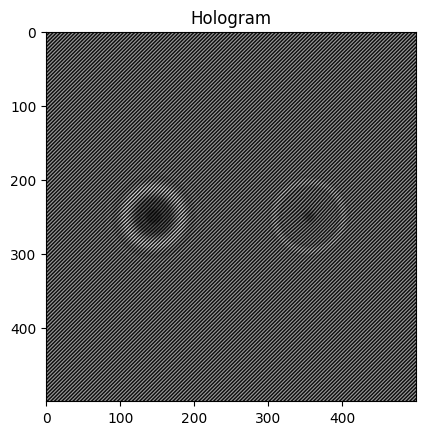

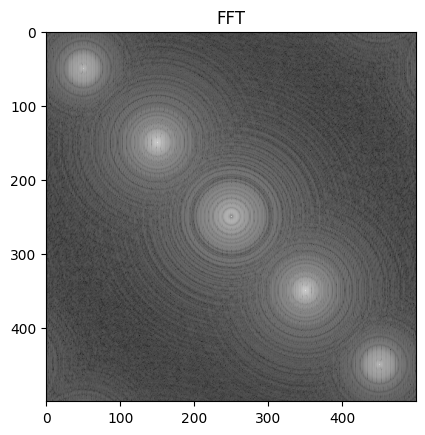

In [14]:
obj_wave = sphere_sample(input_field, radii, xys, zs, ns, lambda_, dxy, scale_factor, final_z = final_z)

ref_Wave = sof.referenceWave(fx_temp, fy_temp, lambda_, dxy, imsize[0], imsize[1])

hologram = sof.simuHolo(ref_Wave, obj_wave, show=True)

hologram = ut.intensity(hologram, False)

ft = ut.ft(hologram)
ut.imageShow(ut.intensity(ft, True), 'FFT')

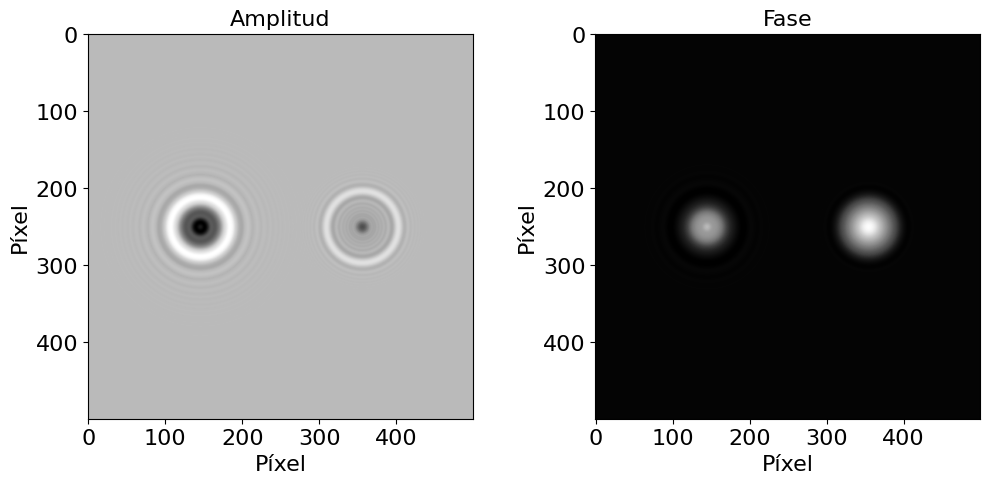

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(np.abs(obj_wave), cmap='gray')
ax1.set_title('Amplitud', fontsize=16)
ax1.set_xlabel('Píxel', fontsize=16)
ax1.set_ylabel('Píxel', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.imshow(np.angle(obj_wave), cmap='gray')
ax2.set_title('Fase', fontsize=16)
ax2.set_xlabel('Píxel', fontsize=16)
ax2.set_ylabel('Píxel', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

## The following code is just for simulation of the conditions of the real DHM microscope
## Since the results are limited by the compensation method, I won't be using it

In [5]:
# Compensate the image only once
holo = compensate(hologram, dxy, dxy, lambda_, region, step=0.1, depth=5)

Text(0.5, 1.0, 'Fase')

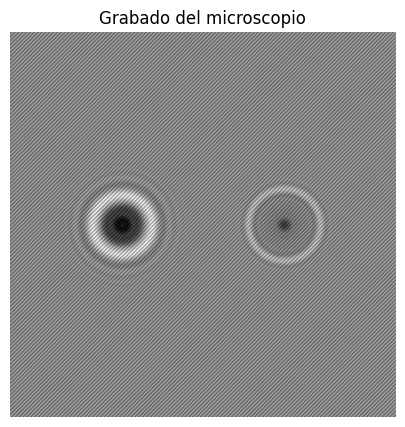

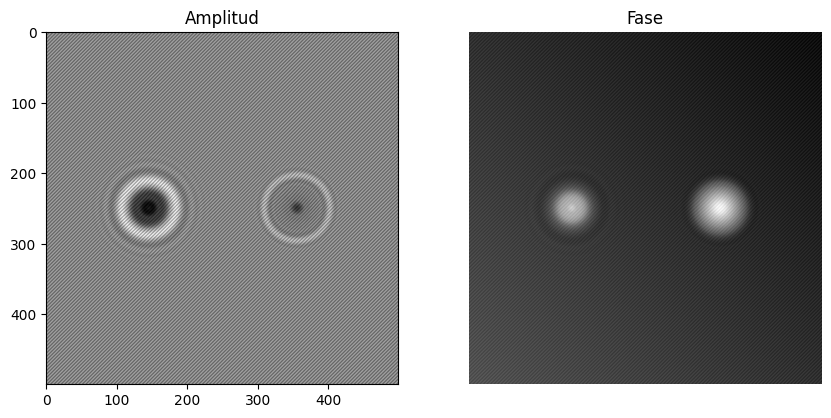

In [6]:
# Show the original and compensated images

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

axes.imshow(np.abs(holo), cmap='gray')
axes.set_title('Grabado del microscopio')
plt.axis('off')


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.axis('off')

axes[0].imshow(np.abs(holo), cmap='gray')
axes[0].set_title('Amplitud')

axes[1].imshow(np.angle(holo), cmap='gray')
axes[1].set_title('Fase')

## End of section

Text(0.5, 1.0, 'Kmeans clustering')

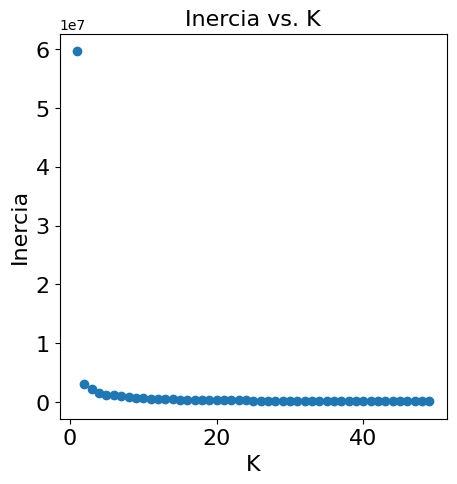

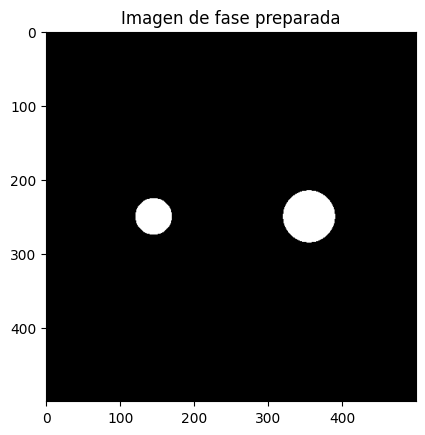

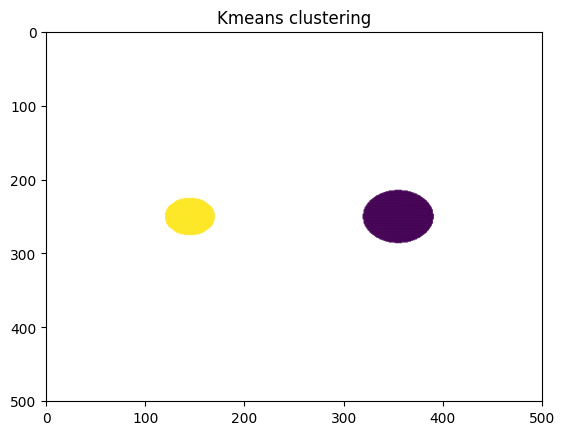

In [16]:
# Performs clustering algorithm and shows all relevant information

BW, vals, clust = cluster(obj_wave, show_elbow_graph=True)

fig, axes = plt.subplots(1, 1)
axes.imshow(BW, cmap='gray')
axes.set_title('Imagen de fase preparada')

fig, axes = plt.subplots(1, 1)
axes.scatter(vals[:, 1], vals[:, 0], c=clust.labels_, s=0.1)
axes.set_xlim([0, obj_wave.shape[1]])
axes.set_ylim([0, obj_wave.shape[0]])
plt.gca().invert_yaxis()

axes.set_title('Kmeans clustering')

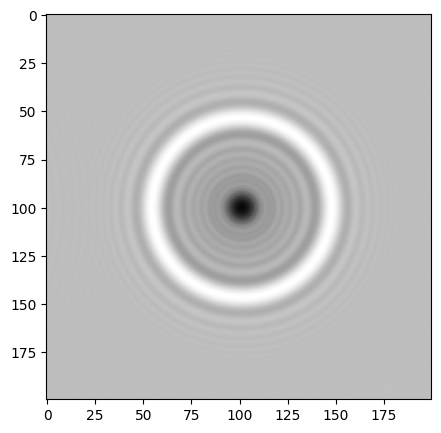

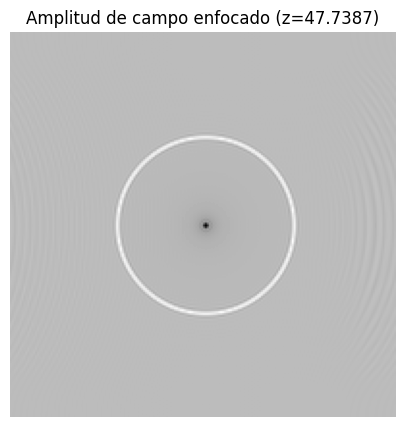

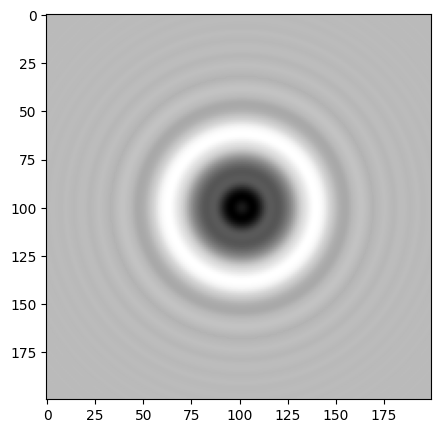

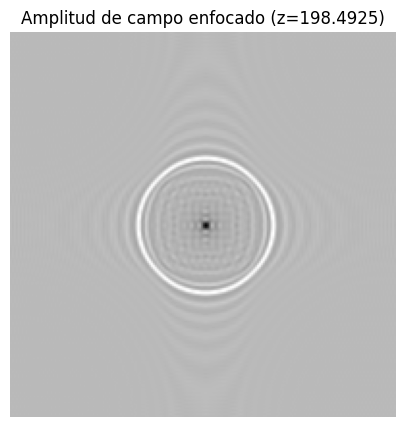

[250.0, 250.0] [354.9999999999999, 144.99999999999937] [47.7387, 198.4925]


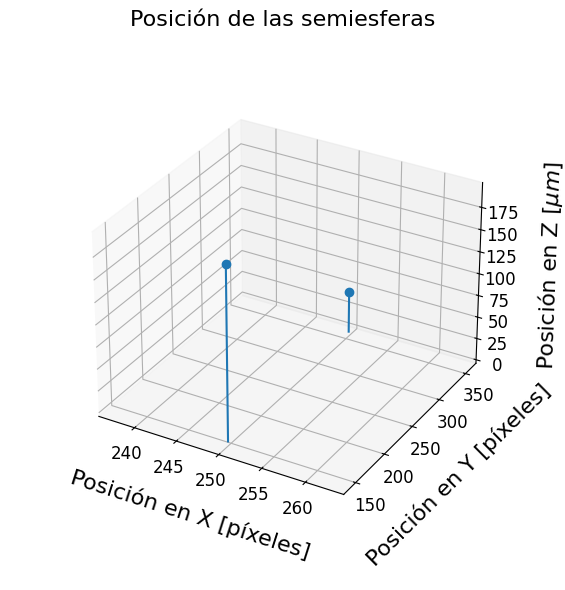

In [29]:
sub = window_extraction(obj_wave, clust.cluster_centers_, (200, 200), rimpercent=(0.8, 0.8))

posx = []
posy = []
posz = []

prop = []

for i in range(len(sub)):
  fig, axes = plt.subplots(1, 1, figsize=(10, 5))
  axes.imshow(np.abs(sub[i]), cmap='gray')
  plt.show()

  prop_foc, distances, metrics = prop_focus(sub[i], clust.cluster_centers_[i], (300, 300), lambda_, dxy, dxy, -500, 500, 200, 40, 1)
  prop.append(prop_foc)


  try:
    #The range of propagation here is hardcoded
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    axes.imshow(np.abs(prop_foc), cmap='gray')
    axes.set_title(f'Amplitud de campo enfocado (z={-distances})')
    plt.axis('off')
    plt.show()


  except:
    continue

  posx.append(clust.cluster_centers_[i][0])
  posy.append(clust.cluster_centers_[i][1])
  posz.append(-distances)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

font_size = 16

print(posx, posy, posz)
markerline, stemlines, baseline = ax.stem(posx, posy, posz)
plt.title("Posición de las semiesferas", fontsize=font_size)
ax.set_xlabel('Posición en X [píxeles]', fontsize=font_size) 
ax.set_ylabel('Posición en Y [píxeles]', fontsize=font_size) 
ax.set_zlabel(r'Posición en Z [$\mu m$]', fontsize=font_size)
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.labelpad = 18
ax.yaxis.labelpad = 18
ax.zaxis.labelpad = 18
plt.tight_layout()

plt.setp(baseline, visible=False)
plt.show()


2


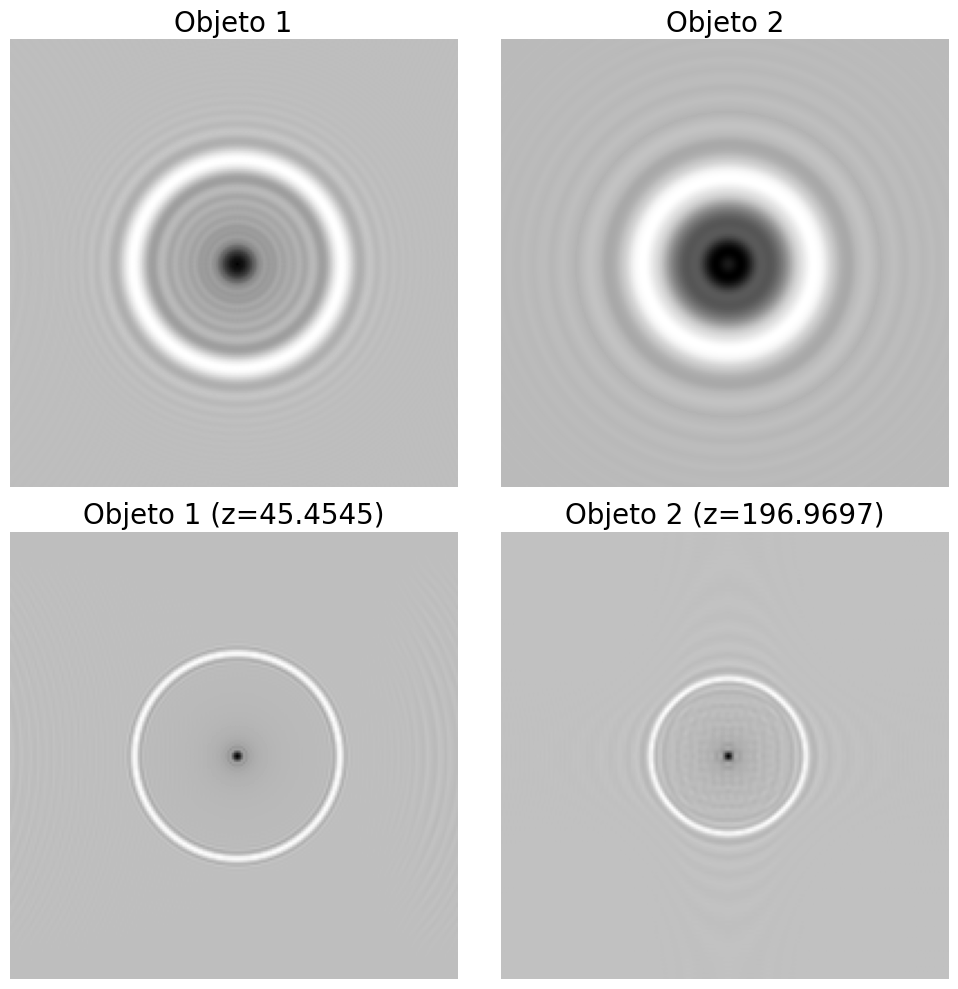

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

font_size = 20
tick_size = 20


# Primer gráfico
axes[0, 0].imshow(np.abs(sub[0]), cmap='gray')
axes[0, 0].set_title('Objeto 1', fontsize=font_size)
axes[0, 0].axis('off')

# Segundo gráfico
axes[0, 1].imshow(np.abs(sub[1]), cmap='gray')
axes[0, 1].set_title('Objeto 2', fontsize=font_size)
axes[0, 1].axis('off')

print(len(prop))
# Tercer gráfico
axes[1, 0].imshow(np.abs(prop[0]), cmap='gray')
axes[1, 0].set_title(f'Objeto 1 (z={posz[0]})', fontsize=font_size)
axes[1, 0].axis('off')


axes[1, 1].imshow(np.abs(prop[1]), cmap='gray')
axes[1, 1].set_title(f'Objeto 2 (z={posz[1]})', fontsize=font_size)
axes[1, 1].axis('off')
plt.tight_layout()



In [9]:
range_ = np.arange(-500, 0, 20)

focall = focus3D(obj_wave, range_, lambda_, dxy, dxy, 10, scale_factor=40)

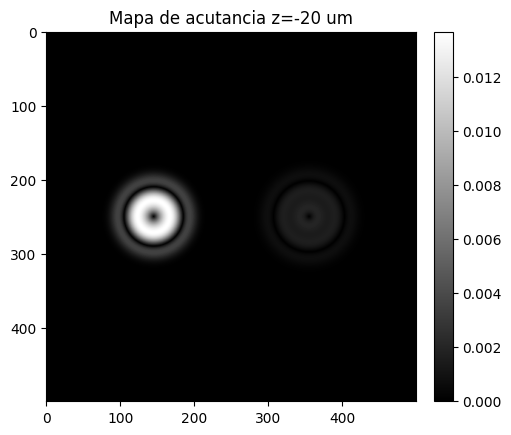

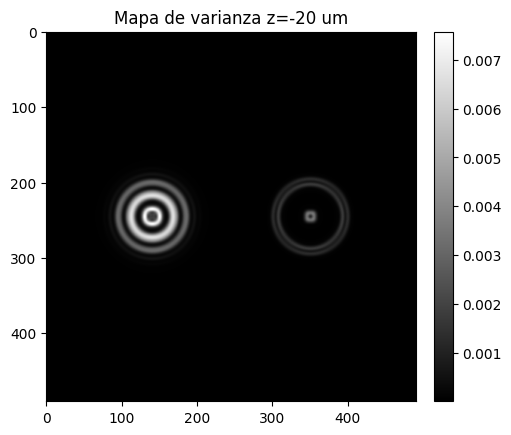

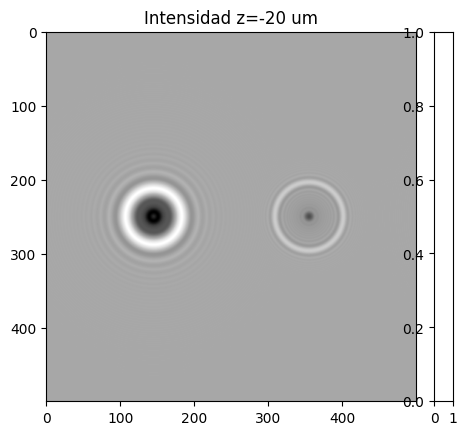

In [10]:

fig, ax = plt.subplots()
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

def animate(i):
    cax.cla()
    acu, _, z_, _ = focall[i]
    ax.clear()
    im = ax.imshow(acu, cmap='gray')
    ax.set_title(f'Mapa de acutancia z={z_} um')
    fig.colorbar(im, cax=cax)


anim = FuncAnimation(fig, animate, frames=len(focall), interval=100)

anim.save('acutance.gif', dpi=150, writer='pillow')
plt.show()

fig, ax = plt.subplots()
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

def animate(i):
    cax.cla()
    _, vari, z_, _ = focall[i]
    ax.clear()
    im = ax.imshow(vari, cmap='gray')
    ax.set_title(f'Mapa de varianza z={z_} um')
    fig.colorbar(im, cax=cax)
 
anim = FuncAnimation(fig, animate, frames=len(focall), interval=100)

anim.save('variance.gif', dpi=150, writer='pillow')
plt.show()

fig, ax = plt.subplots()
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

def animate(i):
    cax.cla()
    _, _, z_, field = focall[i]
    ax.clear()
    im = ax.imshow(np.abs(field)**2, cmap='gray')
    ax.set_title(f'Intensidad z={z_} um')
    #fig.colorbar(im, cax=cax)


anim = FuncAnimation(fig, animate, frames=len(focall), interval=100)

anim.save('absfield.gif', dpi=150, writer='pillow')
plt.show()


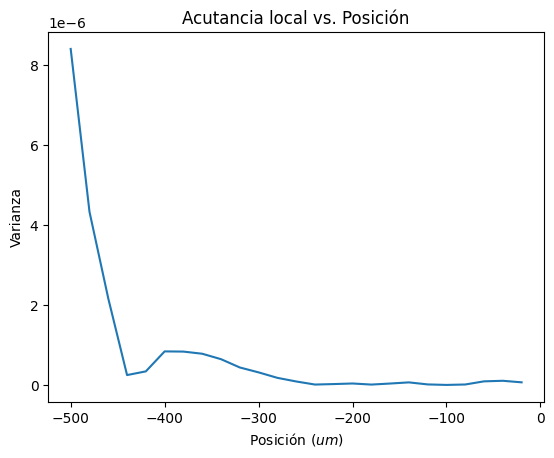

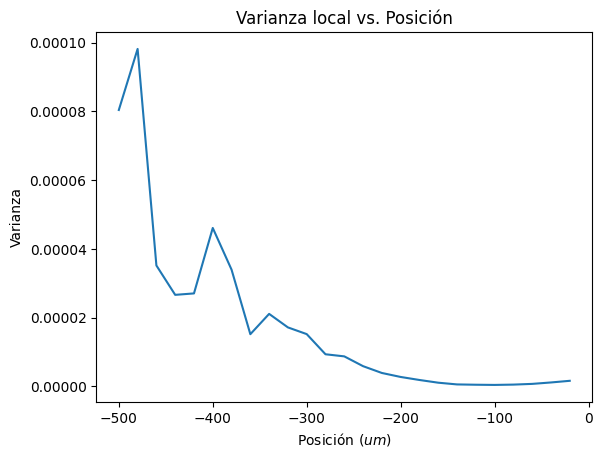

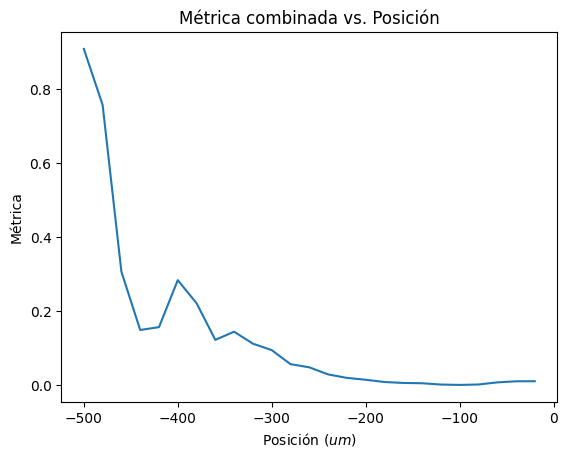

In [11]:
acu = [focall[i][0][250, 250] for i in range(len(range_))]
var = [focall[i][1][250, 250] for i in range(len(range_))]

comb = normalize(acu, 0.5)+normalize(var, 0.5)

plt.figure()
plt.plot(range_, acu)
plt.title('Acutancia local vs. Posición')
plt.xlabel('Posición ($um$)')
plt.ylabel('Varianza')
plt.show()
plt.figure()
plt.plot(range_, var)
plt.title('Varianza local vs. Posición')
plt.xlabel('Posición ($um$)')
plt.ylabel('Varianza')
plt.show()
plt.figure()
plt.plot(range_, comb)
plt.title('Métrica combinada vs. Posición')
plt.xlabel('Posición ($um$)')
plt.ylabel('Métrica')
plt.show()

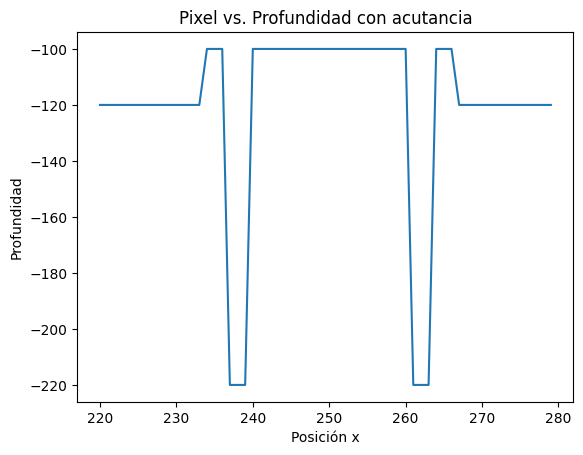

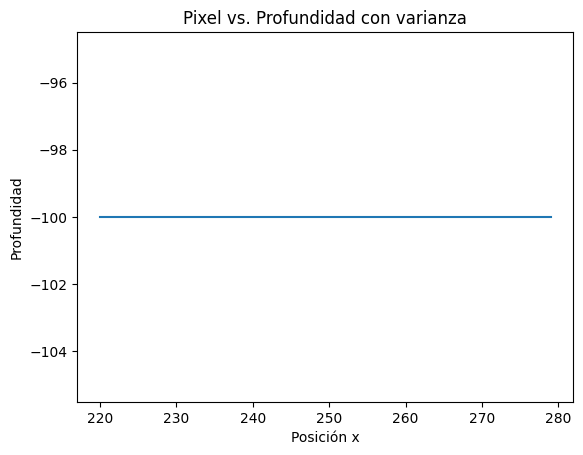

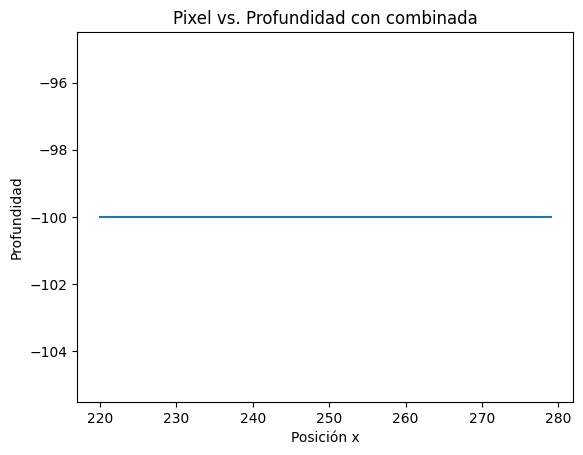

In [12]:
pixels_x = np.arange(220, 280, 1)
#pixels_y = np.arange(230, 270)

curve_acu = []
curve_var = []
curve_comb = []

for x in pixels_x:
    #for y in pixels_y:
    acu = [focall[i][0][x, 250] for i in range(len(range_))]
    var = [focall[i][1][x, 250] for i in range(len(range_))]
    comb = normalize(acu, 0.5)+normalize(var, 0.5)


    curve_acu.append(acu)
    curve_var.append(var)
    curve_comb.append(comb)

zs_acu = []
zs_var = []
zs_comb = []

for x in range(len(pixels_x)):
    z_acu = np.argmin(curve_acu[x])
    z_var = np.argmin(curve_var[x])
    z_comb = np.argmin(curve_comb[x])
    zs_acu.append(range_[z_acu])
    zs_var.append(range_[z_var])
    zs_comb.append(range_[z_comb])

plt.figure()
plt.plot(pixels_x, zs_acu)
plt.title('Pixel vs. Profundidad con acutancia')
plt.xlabel('Posición x')
plt.ylabel('Profundidad')
plt.show()
plt.figure()
plt.plot(pixels_x, zs_var)
plt.title('Pixel vs. Profundidad con varianza')
plt.xlabel('Posición x')
plt.ylabel('Profundidad')
plt.show()
plt.figure()
plt.plot(pixels_x, zs_comb)
plt.title('Pixel vs. Profundidad con combinada')
plt.xlabel('Posición x')
plt.ylabel('Profundidad')
plt.show()



